# Deep Learning
Minicourse, University of Liverpool<br>
April 2022<br>
Lecturer: Mikko Pakkanen

## Implementing Neural Networks in Keras
<i>22 April 2022</i>

First, we import <b>Keras</b> (this requires that <b>TensorFlow</b> is installed):

In [1]:
import tensorflow.keras as keras

Second, for later use we import <b>NumPy</b> and <b>matplotlib</b> (and set a nicer plotting style).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Give the entire architecture 

We can specify a feedforward neural network
$$
f \in \mathcal{N}_3(2,100,100,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{Id}),
$$
say, using the <code>Sequential</code> model of Keras by:

In [3]:
f = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2,)), #can be higher rank matrix
    keras.layers.Dense(100, activation="relu"), #100 number of units, Dense weights not restricted, list or possible layers
    keras.layers.Dense(100, activation="relu"), #relu the activation function
    keras.layers.Dense(1, activation="linear") #identidy called lineat
])

#Sequential has restrictions, otherwise use functional API

An alternative, but equivalent, way of doing the same using the <code>add</code> method is: Going network layer at a time

In [4]:
f = keras.Sequential()
f.add(keras.layers.InputLayer(input_shape=(2,)))
f.add(keras.layers.Dense(100, activation="relu"))
f.add(keras.layers.Dense(100, activation="relu"))
f.add(keras.layers.Dense(1, activation="linear"))

The <code>summary</code> method lets us summarise the specified architecture of the network $f$ and its parameters.

In [5]:
f.summary() #to inspect network, output specifed when training i.e batch size.: input is 2 so: W has 200=100+100 (matrix) weights ,and b has 100

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


We can also visualise the architecture using the function <code>plot_model</code> in <code>keras.utils</code>. (Which is particularly helpful when we have built a model with complicated routings.)

In [8]:
keras.utils.plot_model(f, show_shapes=True) #Same as summary

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


We can remove the final layer of the network using the <code>pop</code> method:

In [9]:
f.pop()

We should then get $f \in \mathcal{N}_2(2,100,100;\mathrm{ReLU},\mathrm{ReLU})$, which we can verify with the <code>summary</code> method.

In [10]:
f.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
Total params: 10,400
Trainable params: 10,400
Non-trainable params: 0
_________________________________________________________________


Let us however <code>add</code> the deleted layer back to the network $f$: 

In [11]:
f.add(keras.layers.Dense(1, activation="linear"))

We can study the layers of the network using the <code>get_layer</code> method. If we are, for example, interested in extracting the layer $\boldsymbol{L}_1(\boldsymbol{x}) = W^1\boldsymbol{x} + \boldsymbol{b}^1$, $\boldsymbol{x} \in \mathbb{R}^2$, we can do it as follows (remember that in Python indexation starts from zero):

In [12]:
L_1 = f.get_layer(index=0)

We can inspect the weight matrix $W^1$ and bias vector $\boldsymbol{b}^1$ using the <code>get_weights</code> method.

In [13]:
print(L_1.get_weights()) #Keras uses a random initialiser, weights , bias

[array([[-0.12700047, -0.15583843, -0.22265486,  0.19015694, -0.14508107,
         0.21118864, -0.16222502, -0.08610085,  0.1146062 , -0.14591357,
         0.23768976,  0.0627555 , -0.12311642, -0.21112572, -0.14658216,
         0.07289571, -0.20110968,  0.13522848,  0.01741105,  0.14052394,
         0.02931154, -0.0187223 , -0.17359775,  0.16002774, -0.21953654,
        -0.09265693, -0.01098773, -0.0987356 , -0.15545626, -0.00535905,
        -0.17067957,  0.21588692, -0.21269983,  0.14403188,  0.08507225,
         0.15118113,  0.09000686, -0.09872942,  0.07439181, -0.24079706,
        -0.10605961, -0.19590907, -0.16275707,  0.10930771, -0.14407913,
        -0.24093844,  0.14971244,  0.0940744 ,  0.11947057,  0.02873629,
         0.06251484,  0.00173324, -0.1049892 , -0.10033435, -0.00129591,
         0.1936993 ,  0.03827366,  0.07486719,  0.13296464,  0.05989918,
        -0.08223531,  0.10328978, -0.01157004, -0.00444303,  0.16748595,
         0.13623935, -0.10688181,  0.14315087, -0.

We have not trained $f$ yet, so $W^1 \in \mathbb{R}^{100 \times 2}$ and $\boldsymbol{b}^1 \in \mathbb{R}^{100}$ are at their initialiser values. By default, <b>Keras</b> uses the random <i>Glorot</i> initialiser for weights and just zeros for biases. We could also specify weights manually using the <code>set_weights</code> method.

The method <code>predict</code> lets us compute $f(\boldsymbol{x})$ for given input $\boldsymbol{x} \in \mathbb{R}^2$. The method expects here the input in the shape <code>(N,2)</code>, where <code>N</code> is the number of different values of $\boldsymbol{x}$ for which we want $f(\boldsymbol{x})$ to be computed. Let us just take <code>N=1</code> and try with $\boldsymbol{x} = (1,0)$.

In [14]:
print(f.predict(np.reshape((1,0), (1,2)))) #Network just functions want to evaluate., can do for range then plot

[[-0.04202627]]


To gain some insight into what an untrained ReLU network looks like, let us use <code>predict</code> to plot $f(x,1)$ for $x \in [-1,1]$.

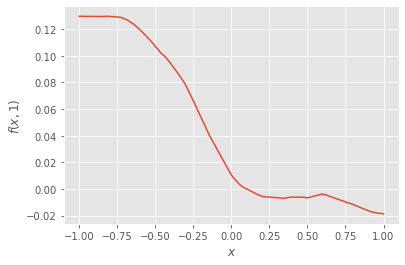

In [15]:
x_grid = np.linspace(-1, 1, num=2001)
x_ones = np.ones((2001, ))
xb = np.stack((x_grid, x_ones), -1) 
y_out = f.predict(xb)
plt.plot(x_grid, y_out)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x,1)$")
plt.show()

Network doenst know task yet, we need the loss function for that.

To prepare $f$ for training, we can use the <code>compile</code> method to specify the loss function $\ell$ and the optimisation method. For example, we can set $\ell$ to be squared loss to be optimised with <i>Adam</i> by:

In [ ]:
f.compile(optimizer="adam", loss="mean_squared_error") #Adam is adjusted version of SGD. 
#Epoch is one run through data.

With training data, consisting of <code>N</code> samples, supplied in arrays <code>X</code> and <code>Y</code> with shapes <code>(N,2)</code> and  <code>(N,1)</code>, respectively, we could now train $f$ with minibatch size $100$ for $10$ epochs, say, by <code>f.fit(X, Y, batch_size=100, epochs=10)</code>. <b>We will return to this in the next example (Example 4.2) where we look into regression.</b>